In [55]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder, Binarizer, LabelBinarizer, KBinsDiscretizer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
from scipy.stats import pearsonr
import pandas as pd
from sklearn.datasets import make_classification, load_digits
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import chi2, SelectKBest

from scipy.stats import f_oneway
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline



In [3]:
data_cleaned = pd.read_csv('data_cleaned.csv')
data_cleaned

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest,categorie_imc
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1,surpoids
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0,obésité modérée
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0,obésité modérée
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0,poids normal
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0,surpoids
...,...,...,...,...,...,...,...,...,...,...,...,...
1331,50,1,30.970,3,0,northwest,10600.54830,0,1,0,0,obésité modérée
1332,18,0,31.920,0,0,northeast,2205.98080,1,0,0,0,obésité modérée
1333,18,0,36.850,0,0,southeast,1629.83350,0,0,1,0,obésité sévère
1334,21,0,25.800,0,0,southwest,2007.94500,0,0,0,1,surpoids


In [4]:
X = data_cleaned[["age", "sex", "children", "smoker","region", "categorie_imc"]]
y = data_cleaned["charges"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42, stratify=X["smoker"])

In [6]:
preprocessor = make_pipeline(make_column_transformer((StandardScaler(), ['children','age']),
                                                     (OrdinalEncoder(), ['smoker', 'sex']), (OneHotEncoder(),['region',"categorie_imc"])), PolynomialFeatures(2))

In [7]:
preprocessor.fit_transform(X_train)

array([[ 1.        ,  2.42210801,  0.78291086, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.75649602,  0.42741245, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.90911597,  1.28060863, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -0.07630998, -0.35468405, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , -0.90911597,  1.35170831, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.07630998, -1.35007959, ...,  0.        ,
         0.        ,  0.        ]], shape=(1135, 120))

In [30]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("polynomial_features", PolynomialFeatures()),
    ("linear_regression", LinearRegression())
])

param_grid = {
    "preprocessor__polynomial_features__degree":[1, 2, 3]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2")

grid.fit(X_train, y_train)

print(grid.score(X_test, y_test))
print(grid.best_params_)

ValueError: Invalid parameter 'polynomial_features' for estimator Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['children', 'age']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['smoker', 'sex']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['region',
                                                   'categorie_imc'])])),
                ('polynomialfeatures', PolynomialFeatures())]). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (120,).

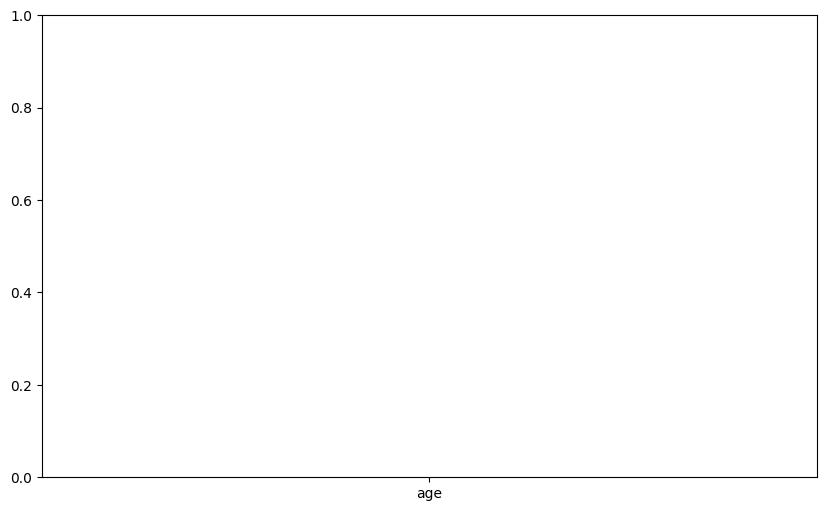

In [67]:
#features = X_train.columns
#coefficients = best_model.coef_
plt.figure(figsize=(10, 6))
plt.bar(features, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Coefficients of the Model') 
plt.show()

Modele Lasso

In [9]:
X = data_cleaned.drop(["bmi", "charges"], axis=1)
y = data_cleaned["charges"]

In [22]:
preprocessor = make_pipeline(make_column_transformer((StandardScaler(), ['children','age']),
                                                     (OrdinalEncoder(), ['smoker', 'sex']), (OneHotEncoder(),['region',"categorie_imc"])), PolynomialFeatures(2))

In [31]:
preprocessor

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['children', 'age']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['smoker', 'sex']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['region',
                                                   'categorie_imc'])])),
                ('polynomialfeatures', PolynomialFeatures())])

In [66]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso", Lasso())
])

param_grid = {
    "lasso__alpha":[10,20,50,100]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2")

grid_search.fit(X_train, y_train)






y_pred = grid_search.predict(X_test)

best_model = grid_search.best_estimator_.named_steps["lasso"]

best_model


print("best parameter:", grid_search.best_params_)

print("Modelscore:", grid_search.score(X_test, y_test))

print("coefficients:", best_model.coef_)

best parameter: {'lasso__alpha': 20}
Modelscore: 0.8723144374326014
coefficients: [ 0.00000000e+00  5.09932787e+02  3.45620906e+03  1.44630375e+04
 -1.13987179e-01  2.59412915e+01  0.00000000e+00 -0.00000000e+00
 -6.16164573e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -2.95259655e+02 -0.00000000e+00 -6.28090618e+01
  2.38242827e+01 -1.29530288e+02  0.00000000e+00  1.48708914e+02
  4.11261956e+02  0.00000000e+00 -9.06138366e+01  3.34166729e+02
 -1.92603665e+02  5.00383404e+02 -0.00000000e+00 -0.00000000e+00
  4.48617524e+02  8.23370963e+02 -0.00000000e+00  4.58319850e+01
  0.00000000e+00 -5.08182861e+01  2.89541464e+02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.57895626e+01  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  1.15434591e+02  2.41692515e+01 -0.00000000e+00
  1.65931226e+04  2.10650189e+04  1.92870882e+04 -2.31892203e+03
 -0.00000000e+00 -0.00000000e+00 -6.25964783e+02 -0.00000000e+00
  0.0000

###calcul résidus Methode Lasso

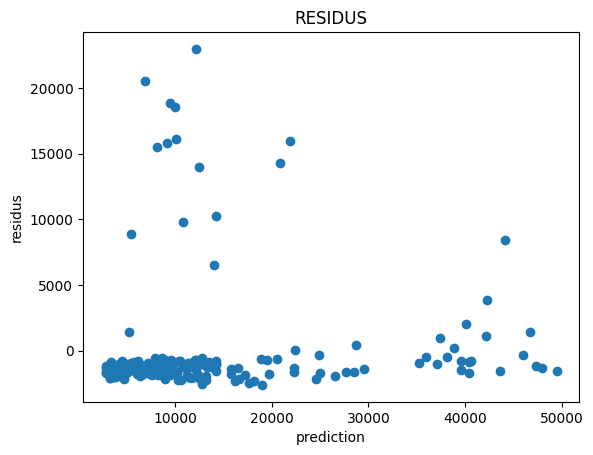

In [38]:
residus = y_test - y_pred

plt.scatter(y_pred, residus)
plt.xlabel("prediction")
plt.ylabel("residus")
plt.title("RESIDUS")
plt.show()

###seuil outliers



In [42]:
threshold = 3 * np.std(residus)
outliers = np.abs(residus) > threshold

identification elimination outliers

In [69]:
outliers_indices = np.where(outliers)[0]
print("Indices des outliers : ", outliers_indices)

X_train_filtered = np.delete(X_train, outliers_indices, axis=0)
y_train_filtered = np.delete(y_train, outliers_indices, axis=0)

Indices des outliers :  [ 19  26 104 109 116 124 140 175 182 189]


Amelioration du modele avec les donnés sans outliers

In [70]:
def lasso_pipeline(X_train_filtered, y_train_filtered, X_test, y_test,preprocessor, param_grid):

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("lasso", Lasso())
    ])

    param_grid = {
        "lasso__alpha":[10,20,50,100]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2")

    grid_search.fit(X_train, y_train)






    y_pred = grid_search.predict(X_test)

    best_model = grid_search.best_estimator_.named_steps["lasso"]

    best_model


    print("best parameter:", grid_search.best_params_)

    print("Modelscore:", grid_search.score(X_test, y_test))

    print("coefficients:", best_model.coef_)

    return best_model, y_pred

In [71]:
lasso_pipeline(X_train_filtered, y_train_filtered, X_test, y_test,preprocessor, param_grid)

best parameter: {'lasso__alpha': 20}
Modelscore: 0.8723144374326014
coefficients: [ 0.00000000e+00  5.09932787e+02  3.45620906e+03  1.44630375e+04
 -1.13987179e-01  2.59412915e+01  0.00000000e+00 -0.00000000e+00
 -6.16164573e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -2.95259655e+02 -0.00000000e+00 -6.28090618e+01
  2.38242827e+01 -1.29530288e+02  0.00000000e+00  1.48708914e+02
  4.11261956e+02  0.00000000e+00 -9.06138366e+01  3.34166729e+02
 -1.92603665e+02  5.00383404e+02 -0.00000000e+00 -0.00000000e+00
  4.48617524e+02  8.23370963e+02 -0.00000000e+00  4.58319850e+01
  0.00000000e+00 -5.08182861e+01  2.89541464e+02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.57895626e+01  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  1.15434591e+02  2.41692515e+01 -0.00000000e+00
  1.65931226e+04  2.10650189e+04  1.92870882e+04 -2.31892203e+03
 -0.00000000e+00 -0.00000000e+00 -6.25964783e+02 -0.00000000e+00
  0.0000

(Lasso(alpha=20),
 array([14241.75696823, 37436.19957267, 13776.08406001, 43627.18607525,
        35205.27795026, 11424.50941743, 14001.17131091,  5557.14887555,
        12147.08048705, 40639.87746113, 11349.326815  ,  3225.18628101,
        13655.95345192,  4456.76273561, 14175.15046221,  3239.31153965,
         3457.34443608, 12901.25383074,  6223.16182268, 20816.27534945,
        14215.71488508,  8857.80229021,  3315.88071741, 12512.39782662,
        12139.57764989,  9371.35940176,  9505.00251663, 12410.50720086,
         4206.39876933, 12776.95976504,  5425.92570154,  4733.53968263,
        10849.2937565 , 19492.86378036, 35960.89500939, 45993.44923553,
         3720.59229695,  7439.17643238, 13291.11598141,  7868.50430165,
        12659.0067199 , 10767.22665417, 26575.10995182, 19020.3581655 ,
        27725.73401887, 14201.13705072,  8829.93058215,  6161.05960619,
        39603.76812985,  3809.96903864, 12512.39782662, 44128.68618473,
        12800.33157497,  8376.07060985,  3554.

In [15]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("ridge", Ridge())
])

param_grid = {
    "ridge__alpha":[0.1,1,10,20,50,100]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2")

grid_search.fit(X_train, y_train)






y_pred = grid_search.predict(X_test)


best_model = grid_search.best_estimator_.named_steps["ridge"]


print("best parameter:", grid_search.best_params_)

print("Modelscore:", grid_search.score(X_test, y_test))

print("coefficients:", best_model.coef_)





best parameter: {'ridge__alpha': 1}
Modelscore: 0.8709635562534417
coefficients: [     0.            541.41945571   2590.16477553  10052.95626745
   -354.22405722    222.5394052     293.91736857    -64.97851127
   -451.4782625     129.08508871    401.07194515    172.06606232
     86.12094987   -621.45373684   -166.89030921   -107.38496191
     29.96291892   -299.94035018    -66.89096242    265.80572273
    443.12519138     29.27751197   -196.78897037    461.76068072
   -596.02122742    670.11866118     23.94362375   -577.737233
    559.35495049    862.70810456    -69.31269179     76.9922913
    529.05533211    462.60341       978.57130312    619.93473029
    289.19531695    416.48419612    132.43027965    106.4952016
   1238.47855941    407.0812218   10052.95626745     17.51849686
   1913.86946984   3055.1807086    2709.71282552   2374.19326348
   8720.26108125  14080.05722636  11256.10395925 -10834.60200112
  -4974.70732397  -8194.15667432   -354.22405722   -335.74661639
    257.75601

###elasticNet

In [68]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("elasticnet", ElasticNet())
])

param_grid = {
    "elasticnet__alpha":[10,20,50,100],
    "elasticnet__l1_ratio":[0.1, 0.5, 0.7, 1]

}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="r2")

grid_search.fit(X_train, y_train)






y_pred = grid_search.predict(X_test)

best_model = grid_search.best_estimator_.named_steps["elasticnet"]


print("best parameter:", grid_search.best_params_)

print("Modelscore:", grid_search.score(X_test, y_test))

print("coefficients:", best_model.coef_)

best parameter: {'elasticnet__alpha': 20, 'elasticnet__l1_ratio': 1}
Modelscore: 0.8723144374326014
coefficients: [ 0.00000000e+00  5.09932787e+02  3.45620906e+03  1.44630375e+04
 -1.13987179e-01  2.59412915e+01  0.00000000e+00 -0.00000000e+00
 -6.16164573e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -2.95259655e+02 -0.00000000e+00 -6.28090618e+01
  2.38242827e+01 -1.29530288e+02  0.00000000e+00  1.48708914e+02
  4.11261956e+02  0.00000000e+00 -9.06138366e+01  3.34166729e+02
 -1.92603665e+02  5.00383404e+02 -0.00000000e+00 -0.00000000e+00
  4.48617524e+02  8.23370963e+02 -0.00000000e+00  4.58319850e+01
  0.00000000e+00 -5.08182861e+01  2.89541464e+02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.57895626e+01  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  1.15434591e+02  2.41692515e+01 -0.00000000e+00
  1.65931226e+04  2.10650189e+04  1.92870882e+04 -2.31892203e+03
 -0.00000000e+00 -0.00000000e+00 -6.25964

### modele Ridge

###Leviers